## Hands-on implementation of neural network from scratch

In this notebook, we are going to implement this artificial neural network in Python. Our task is to build a classifier to predict the gender of the given person using ANN. The dataset used for this task consists of information on the physical parameters of the person such as nose width, long hair, forehead height, etc. So using the dataset and ANN we are going to build this binary classifier. 

The following steps are to be taken to implement the ANN. 

#### load and read the data 

The dataset is stored in a CSV file so by using the Pandas library we are going to load this file into our system and will visualize the first five rows of it. 

In [1]:
# Importing pandas to read data
import pandas as pd

# Reading the dataset
data = pd.read_csv('gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


The above dataset consists of all the essential information that is required to classify the gender, let’s check the shape of the dataset which can give us an idea of the number of records and number of features present in the dataset.

In [2]:
# Shape of the data
data.shape

(5001, 8)

There are around 5000 records and 8 features are present in the dataset. As we are dealing with a classification problem it is necessary to check how the classes of outcome variables are spared.  

In [3]:
# Counting labels
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

As we can see the classes are well distributed and perfectly balanced there is no need for class balancing at all. 

#### Preprocessing and defining features

The class labels are stored in textual form and we need to convert those classes into numbers because models deal with data only in form of numbers. So first we replace the Female class with 0 and the class with 1, this will ultimately realize the binary nature of the output variables.  

In [4]:
# Lableeing with numerical values
data['gender'] = data['gender'].replace(to_replace=['Female', 'Male'], value=[0, 1])
data['gender'].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

Above, we have successfully converted the textual form class into numbers. 

Next, we will define the input and output features from the dataset that we are using. The first 7 variables will be used as input variables and the last one will be used as output variables.  

In [5]:
# Defining input and output features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Now we define both input and output features, let’s check the shape of these defined data.

In [6]:
# Checking shape of input-output features
print(X.shape)
print(y.shape)

(5001, 7)
(5001,)


Further, we will split this X and y into train and test data using scikit learn’s train_test_split method.  

In [7]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

Out of the original data, we are using 20% of the data for testing the data, and the rest of the data will be used to train the neural network. Below we can the shapes of both training and testing data.  

In [8]:
# Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 7)
(4000,)
(1001, 7)
(1001,)


#### Building an Artificial Neural Network

To build the ANN network we used a deep learning framework called Keras with the backend of the TensorFlow library. TensorFlow is basically deep learning which facilitates all the building blocks for neural networks from basic to advanced and Keras is a wrapper library which gives us beautiful APIs to access these building blocks of TensorFlow. 

So will build ANN using a Keras sequential model, a model which sequentially combines the layers of the network. The Keras Dense layers are used as neurons of the networks. Now below we will first import the dependencies from the Keras library.   

In [9]:
# Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense

Next, we will initialize the sequential model, and add the dense layers to the model. Our model consists of 3 layers. The first input layers consist of the 12 neurons for 7 input features and these neurons will be activated according to the Relu activation function. 

The next hidden layer is 8 neurons with activation of Relu and the last layer will consist of only one neuron because we are going to predict the only one class from the at the time this layer will have activation function as sigmoid which is the most suitable activation function for binary classification problem. 

Below is how we can code our model.

In [10]:
# Defining the neural network model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Let’s take a look at the summary of the model so we can validate whether the model has been built according to the definition or not.

In [11]:
# Summary of the neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


As we can see the model has been correctly built with the correct definition of the neuron at each layer. In the summary, the model has a total of 209 trainable parameters. 

Next, we have to add the loss function to the model and optimizer to optimize this loss function so that model can converge faster and at the desired point. This is usually done using the model’s .compile() method where we can specify the loss function, optimizer function, and additional certain metrics on which the model will be evaluated during training and testing.   

For our problem dealing with binary classification, the binary_crossentropy will be the loss function and this loss function will be optimized using the Stochastic gradient descent optimizer. Additionally, we are also using accuracy metrics to check the scores of the metrics. 

In [12]:
# Compiling the classifier
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Now we are all set to train the model, .fit() method is used to train the model where we have to feed the training dataset that we have created in step 2, this training will take place for 10 epochs with a batch size of 10 and each epoch will have 400 instances to train the model.  

The training instances for each epoch are calculated as: our training is having 4000 instances and we have chosen a batch size of 10 so for each epoch model will experience (4000/10) = 400 instances. 

Now let’s start the training.

In [13]:
# Training the classifier
history = model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.5825 - accuracy: 0.6935
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2098 - accuracy: 0.9255
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1512 - accuracy: 0.9477
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9448
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1161 - accuracy: 0.9550
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1207 - accuracy: 0.9488
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9520
Epoch 8/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9538
Epoch 9/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1035 - accuracy: 0.9545
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9555

As we can see after 10 epochs the model has reached an accuracy of 95.4% per cent on training data loss is around 0.1098 units. 

Let’s visualize this accuracy and loss.

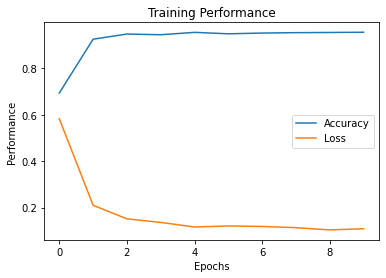

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.title('Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

As we can see in the above curve the loss started decreasing from 0.6 and stopped around 0.1 which is a significant drop, similarly, we can initiate the accuracy was 70% and finally, it reached around 95%. 

So finally let’s check the accuracy on training and testing data as below. 

In [15]:
# Checking training and test accuracies
scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

125/125 [==============================] - 0s 3ms/step - loss: 0.1370 - accuracy: 0.9570
Training Accuracy: 95.70%

32/32 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9491
Testing Accuracy: 94.91%



As we can see the accuracy of both training and testing is above 95% which is a good sign that the model has fitted very well with training data and is able to generalize the generalizations on testing very well. 

So this is how we can leverage the artificial neural network to address the binary classification problem on a real-world dataset.  